In [1]:
from sklearn.datasets import load_files
reviews_train = load_files('C:\\Users\\default.DESKTOP-TEHK88J\\OneDrive\\Documents\\aclImdb\\train')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]
reviews_test = load_files('C:\\Users\\default.DESKTOP-TEHK88J\\OneDrive\\Documents\\aclImdb\\test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [3]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics = lda.fit_transform(X)

In [4]:
lda.components_.shape

(10, 10000)

In [5]:
import numpy as np
import mglearn
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        actors        horror        show          show          
game          script        killer        didn          family        
fight         didn          gore          now           father        
guy           nothing       director      10            wife          
john          director      dead          got           woman         
cop           book          blood         want          young         
gets          work          quite         re            mother        
car           worst         house         saw           new           
lee           actually      genre         going         series        
fun           doesn         dark          thought       episode       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
us  

In [10]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [11]:
import numpy as np
import mglearn

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        fun           mr            effects       french        western       game          
park          gary          jane          special       english       town          lee           
jean          billy         novel         sound         italian       stewart       games         
football      baseball      hudson        ll            la            john          fight         
matt          flash         rochester     bugs          language      west          fu            
day           gordon        timothy       recommend     subtitles     bank          kung          
south         dvd           kyle          thought       karloff       westerns      play          
national      crystal       charlotte     music         miike         president     dragon        
reno      

In [12]:
import numpy as np

# Сортируем документы по весу темы "музыка" (индекс темы 45) по убыванию
music = np.argsort(document_topics100[:, 45])[::-1]

# Выводим первые два предложения из 10 самых релевантных документов для темы "музыка"
for i in music[:10]:
    print(b". ".join(text_train[i].split(b".")[:2]) + b".\n")

b'"After the Sunset" - Pierce Bros- nan, Salma Hayek, Woody Harrelson, Naomi Harris, Don Cheadle.  Master thief Max (Brosnan) and his lovely accomplice Lola (Hayek) are retired on a paradise island.\n'
b'This film is puree of heist movies: the Comic Heist (Ocean\'s Eleven), the Sexy Heist (The Thomas Crown Affair), the One Last Heist (The Score), and the "Gee, I Kinda Like the Guy I\'m Chasing/Being Chased By " Heist (Heat).  The result is a bland time-waster.\n'
b"This was Uma Thurman's first feature film, and she started her acting career right at the very bottom.  She is youthful and attractive in this film, but that's all the film has going for it.\n"
b'Surprisingly mild vehicle for Pam Grier, targeted at the black urban audiences of the 1970s, isn\'t terribly good despite a varied roster of bemused supporting talents, including Jim Backus, Yaphet Kotto, Scatman Crothers, Godfrey Cambridge, Carl Weathers from "Rocky", Ted Lange from "The Love Boat", and Eartha Kitt, hamming it up a

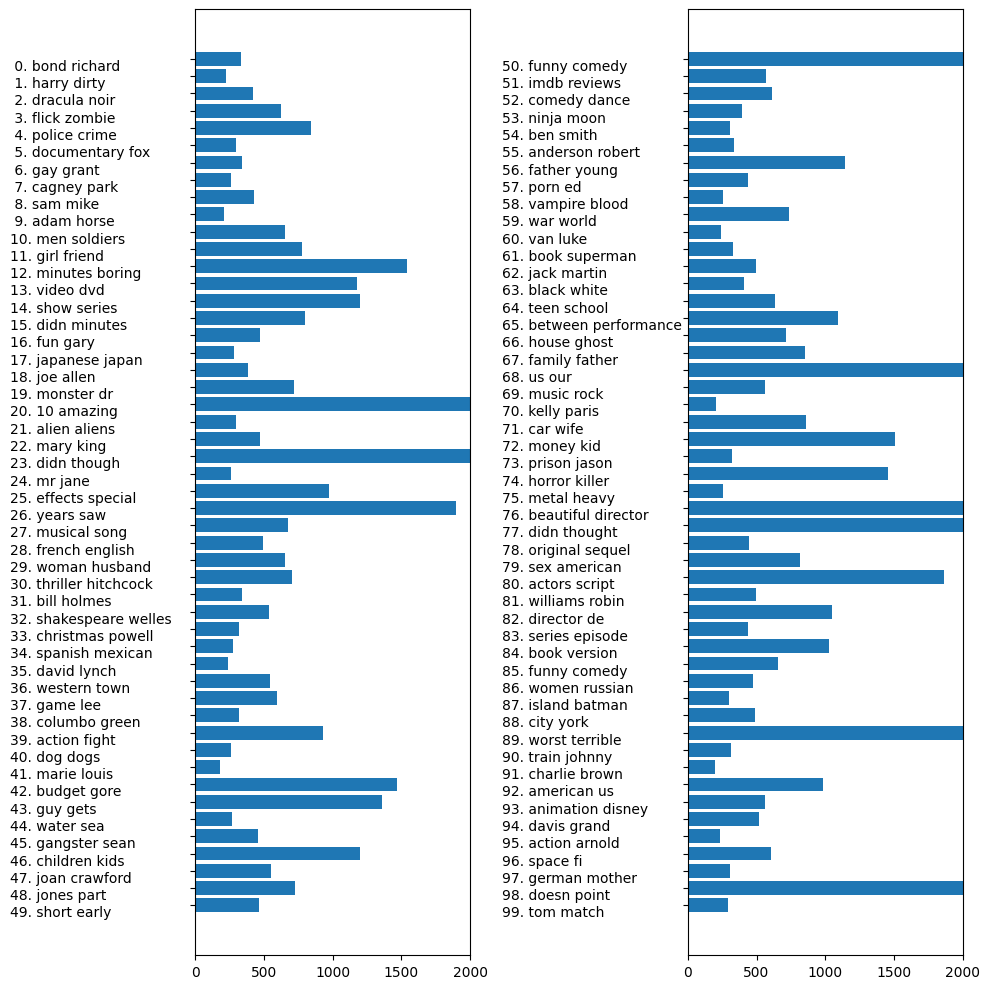

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2}'.format(i) + '. ' + ' '.join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()